In [1]:
!pip install nltk matplotlib pandas textstat fonemas

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/60/90/81ac364ef94209c100e12579629dc92bf7a709a84af32f8c551b02c07e94/nltk-3.9.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/fc/8e/0a18d6d7d2d0a2e66585032a760d13662e5250c784d53ad50434e9560991/matplotlib-3.10.6-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for textstat from https://files.pythonhosted.org/packages/18/76/3b2a2677a7ef26573ecf7a55f71b605119a7de9473644d0a828c0d86b11b/textstat-0.7.10-py3-none-any.whl.metadata
  Obtaining dependency information for fonemas from https://files.pythonhosted.org/packages/d8/d5/f61585d0000e416fe070542ce534ca5ce7003f8c3719ef0d55fd37c090d5/fonemas-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/db/d3/9dcc0f5797f070ec8edf30fbadfb200e71d9db6b84d211e3b2085a7589a0/click-8.3.0-py3-none-any.whl.metad


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords

# Descargar solo una vez
nltk.download('stopwords')
stopwords_esp = set(stopwords.words('spanish'))

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from fonemas import Transcription
import textstat
import re
import os
import pandas as pd
from IPython.display import display


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PERSONAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PERSONAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PERSONAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
Matplotlib is building the font cache; this may take a moment.


# Preprocesamiento inicial

In [3]:
import zipfile
import os

def descomprimir_zip(ruta_zip, carpeta_destino):
    # Verificar si el archivo existe
    if not os.path.exists(ruta_zip):
        print(f"El archivo {ruta_zip} no existe.")
        return

    # Crear carpeta destino si no existe
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)

    # Abrir y extraer el zip
    with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
        zip_ref.extractall(carpeta_destino)
        print(f"Archivo descomprimido en: {carpeta_destino}")

# Ejemplo de uso
ruta_zip = "cantemist.zip"            # Ruta al archivo zip
carpeta_destino = "cantemist"  # Carpeta donde se extraerá
descomprimir_zip(ruta_zip, carpeta_destino)


El archivo cantemist.zip no existe.


In [13]:

def cargar_textos_carpeta(carpeta_textos):
    documentos = []
    for archivo in os.listdir(carpeta_textos):
        if archivo.endswith(".txt"):
            ruta = os.path.join(carpeta_textos, archivo)
            with open(ruta, "r", encoding="utf-8") as f:
                contenido = f.read()
                documentos.append({"archivo": archivo, "texto": contenido})
    return pd.DataFrame(documentos)

# Ruta a la carpeta de entrenamiento (ajusta según tu estructura)
carpeta_train = "C:\\Users\\PERSONAL\\Documents\\Maestría en Inteligencia Artificial\\Semestre I\\NLP\\Proyecto\\Segunda entrega\\cantemist-nlp\\data\\cantemist\\background-set\\"
#carpeta_train = "... \\data\\cantemist\\background-set\\"

df_textos = cargar_textos_carpeta(carpeta_train)
print(df_textos.shape)
# Muestra los primeros textos
df_textos#.head()


(4932, 2)


,archivo,texto
0,caso_clinico_radiologia1.txt,Anisocoria en varón de 53 años que horas antes...
1,caso_clinico_radiologia10.txt,\n\nVarón de 63 años con antecedentes de Billr...
2,caso_clinico_radiologia100.txt,Paciente 85 años hipertensa con dolor abdomina...
3,caso_clinico_radiologia1000.txt,"Varón de 40 años de origen africano, asintomát..."
4,caso_clinico_radiologia1001.txt,Varón de 60 años llega aemergencia presentando...
...,...,...
4927,S2254-28842016000400013-2.txt,Mujer de 74 años con enfermedad renal crónica ...
4928,S2254-28842016000400014-1.txt,"Presentamos el caso de una mujer de 52 años, c..."
4929,S2254-28842017000200184-1.txt,"Paciente de 45 años, sextigesta, con embarazo ..."
4930,S2254-28842018000200188-1.txt,Varón de 49 años que inició tratamiento de hem...


In [14]:

# Contar palabras por archivo
df_textos["word_count"] = df_textos["texto"].apply(lambda x: len(x.split()))

# Mostrar cada archivo con su cantidad de palabras
print(df_textos[["archivo", "word_count"]])

# Calcular promedio de palabras por archivo
promedio_palabras = df_textos["word_count"].mean()
print("\nNúmero promedio de palabras por archivo:", promedio_palabras)


                              archivo  word_count
0        caso_clinico_radiologia1.txt         109
1       caso_clinico_radiologia10.txt         213
2      caso_clinico_radiologia100.txt          85
3     caso_clinico_radiologia1000.txt         103
4     caso_clinico_radiologia1001.txt          66
...                               ...         ...
4927    S2254-28842016000400013-2.txt        1121
4928    S2254-28842016000400014-1.txt        1072
4929    S2254-28842017000200184-1.txt         767
4930    S2254-28842018000200188-1.txt         120
4931    S2340-98942015000100005-1.txt         304

[4932 rows x 2 columns]

Número promedio de palabras por archivo: 333.61942416869425


In [18]:
def concatenar_textos(carpeta_textos):
    corpus = []
    for archivo in os.listdir(carpeta_textos):
        if archivo.endswith(".txt"):
            ruta = os.path.join(carpeta_textos, archivo)
            with open(ruta, "r", encoding="utf-8") as f:
                contenido = f.read()
                corpus.append(contenido)
    return " ".join(corpus)

# Ruta a la carpeta de entrenamiento (ajústala a tu entorno)
carpeta_train = "C:\\Users\\PERSONAL\\Documents\\Maestría en Inteligencia Artificial\\Semestre I\\NLP\\Proyecto\\Segunda entrega\\cantemist-nlp\\data\\cantemist\\background-set\\"

corpus_general = concatenar_textos(carpeta_train)

print("Longitud total del corpus (caracteres):", len(corpus_general))
print("Primeros 500 caracteres:\n", corpus_general[:500])

Longitud total del corpus (caracteres): 11002293
Primeros 500 caracteres:
 Anisocoria en varón de 53 años que horas antes había sido sometido a una trombectomía por oclusión de la arteria cerebral posterior izquierda. HALLAZGOS: - Trombo en origen de la arteria cerebral posterior izquierda con caída del flujo sanguíneo en el territorio afectado. También se observaba caída en el tiempo de drenaje con conservación del volumen sanguíneo (imágenes no incluidas).- TC a las 5 h por anisocoria: Aumento de densidad en la hemiprotuberancia izquierda, hemisferios cerebelosos, ci


In [19]:

def calcular_textometria(texto):
    return {
        "Flesch Reading Ease": textstat.flesch_reading_ease(texto),
        "Gunning Fog Index": textstat.gunning_fog(texto),
        "Automated Readability Index": textstat.automated_readability_index(texto),
        "SMOG Index": textstat.smog_index(texto),
        "Dale-Chall Readability Score": textstat.dale_chall_readability_score(texto),
        "Fernández-Huerta": textstat.fernandez_huerta(texto),
        "Gutierrez-Polini": textstat.gutierrez_polini(texto),
        "Szigriszt-Pazos": textstat.szigriszt_pazos(texto),
        "Crawford": textstat.crawford(texto),
        "Word Count": textstat.lexicon_count(texto, removepunct=True)  # número de palabras
    }

In [20]:
calcular_textometria(corpus_general)

{'Flesch Reading Ease': 24.893763768880007,
 'Gunning Fog Index': 18.51945152117494,
 'Automated Readability Index': 15.66502211892594,
 'SMOG Index': 16.31431037580516,
 'Dale-Chall Readability Score': 19.91626328812559,
 'Fernández-Huerta': 71.59255209277667,
 'Gutierrez-Polini': 34.344249650978654,
 'Szigriszt-Pazos': 67.62607703460415,
 'Crawford': 4.9237757142282526,
 'Word Count': 1640862}

In [21]:
def preprocesar_texto(texto, remover_stopwords=True):
    """
    Preprocesa un texto:
      - Convierte a minúsculas
      - Elimina caracteres no alfanuméricos
      - Tokeniza en palabras
      - (Opcional) elimina stopwords en español
    """
    # 1. Minúsculas
    texto = texto.lower()

    # 2. Eliminar caracteres que no sean letras o números
    texto = re.sub(r'[^a-záéíóúüñ0-9\s]', ' ', texto)

    # 3. Tokenizar (separar por espacios)
    tokens = texto.split()

    # 4. Remover stopwords si se activa
    if remover_stopwords:
        tokens = [t for t in tokens if t not in stopwords_esp]

    # 5. Reconstruir texto limpio
    texto_limpio = " ".join(tokens)

    return texto_limpio

De search:  Empty DataFrame
Columns: [Palabra, Frecuencia, Rango, Ley_Zipf]
Index: []

        Palabra  Frecuencia  Rango     Ley_Zipf
0      paciente        9848      1  9848.000000
1   tratamiento        7172      2  4924.000000
2          años        6977      3  3282.666667
3            mg        5837      4  2462.000000
4             1        5279      5  1969.600000
5             2        4861      6  1641.333333
6             5        4443      7  1406.857143
7             3        4073      8  1231.000000
8          días        3627      9  1094.222222
9       estudio        3557     10   984.800000
10        meses        3491     11   895.272727
11           dl        3435     12   820.666667
12         tras        3374     13   757.538462
13        dolor        3370     14   703.428571
14      realizó        3291     15   656.533333
15          día        3238     16   615.500000
16            4        3215     17   579.294118
17    evolución        3108     18   547.111111
1

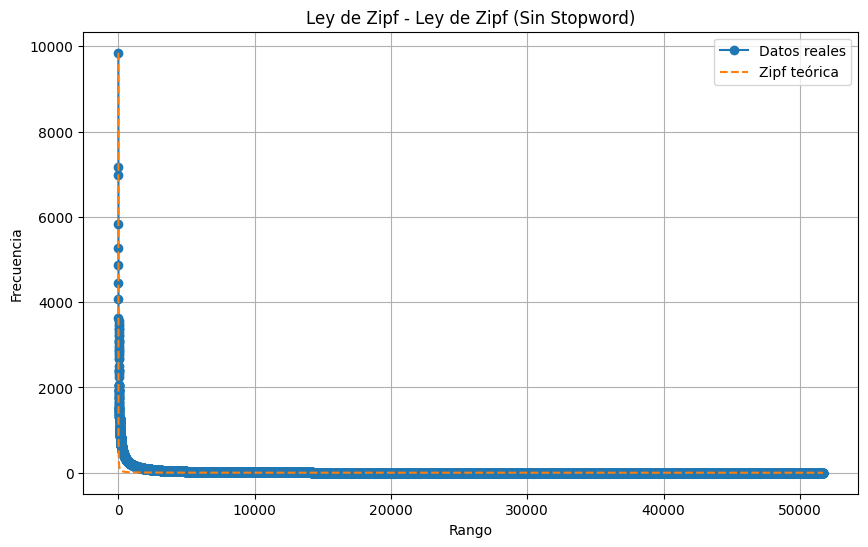

De search:    Palabra  Frecuencia  Rango  Ley_Zipf
0      de      127121      1  127121.0

        Palabra  Frecuencia  Rango       Ley_Zipf
0            de      127121      1  127121.000000
1            la       57820      2   63560.500000
2             y       52456      3   42373.666667
3            en       43437      4   31780.250000
4           con       37412      5   25424.200000
5            se       37087      6   21186.833333
6            el       33903      7   18160.142857
7             a       26132      8   15890.125000
8           que       20056      9   14124.555556
9           una       17999     10   12712.100000
10          del       17755     11   11556.454545
11          por       16033     12   10593.416667
12           un       14413     13    9778.538462
13          los       12546     14    9080.071429
14     paciente        9848     15    8474.733333
15           no        9280     16    7945.062500
16          sin        8903     17    7477.705882
17       

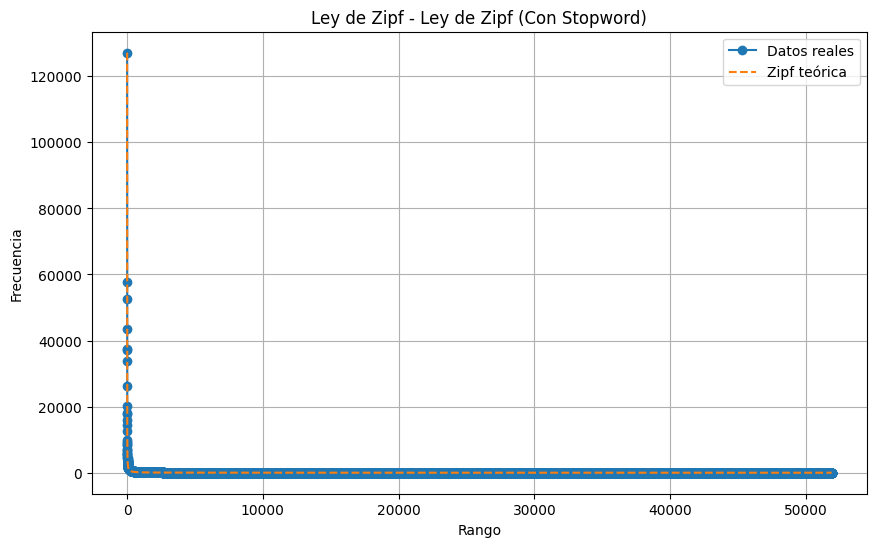

In [22]:
# FUNCIÓN: Análisis Léxico - Ley de Zipf
def analizar_ley_zipf(texto, titulo):
    tokens = word_tokenize(texto.lower())
    tokens = [t for t in tokens if re.match(r'^\w+$', t)]  # Solo palabras alfanuméricas
    #tokens = [t for t in tokens if t not in stopwords_esp]
    freqs = Counter(tokens)
    df = pd.DataFrame(freqs.items(), columns=['Palabra', 'Frecuencia'])
    df = df.sort_values(by='Frecuencia', ascending=False).reset_index(drop=True)
    df['Rango'] = df.index + 1
    df['Ley_Zipf'] = df['Frecuencia'].iloc[0] / (df['Rango'])
    print("De search: ",df[df["Palabra"]=="de"])
    print()
    print(df.head(20))
    print()

    plt.figure(figsize=(10, 6))
    plt.plot(df['Rango'], df['Frecuencia'], marker='o', label='Datos reales')
    plt.plot(df['Rango'], df['Ley_Zipf'], linestyle='--', label='Zipf teórica')
    plt.title(f"Ley de Zipf - {titulo}")
    plt.xlabel("Rango")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()

    return df

# EJECUTAR ANÁLISIS LÉXICO
df_zipf_true = analizar_ley_zipf(preprocesar_texto(texto = corpus_general, remover_stopwords=True), "Ley de Zipf (Sin Stopword)")
df_zipf_false = analizar_ley_zipf(preprocesar_texto(texto = corpus_general, remover_stopwords=False), "Ley de Zipf (Con Stopword)")


In [23]:
print(corpus_general[:500])
print(40*"--")
preprocesar_texto(texto = corpus_general, remover_stopwords=False)[:500]

Anisocoria en varón de 53 años que horas antes había sido sometido a una trombectomía por oclusión de la arteria cerebral posterior izquierda. HALLAZGOS: - Trombo en origen de la arteria cerebral posterior izquierda con caída del flujo sanguíneo en el territorio afectado. También se observaba caída en el tiempo de drenaje con conservación del volumen sanguíneo (imágenes no incluidas).- TC a las 5 h por anisocoria: Aumento de densidad en la hemiprotuberancia izquierda, hemisferios cerebelosos, ci
--------------------------------------------------------------------------------


'anisocoria en varón de 53 años que horas antes había sido sometido a una trombectomía por oclusión de la arteria cerebral posterior izquierda hallazgos trombo en origen de la arteria cerebral posterior izquierda con caída del flujo sanguíneo en el territorio afectado también se observaba caída en el tiempo de drenaje con conservación del volumen sanguíneo imágenes no incluidas tc a las 5 h por anisocoria aumento de densidad en la hemiprotuberancia izquierda hemisferios cerebelosos cisternas de l'

In [25]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 330.3 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/299.9 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PERSONAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Remover Stopwords


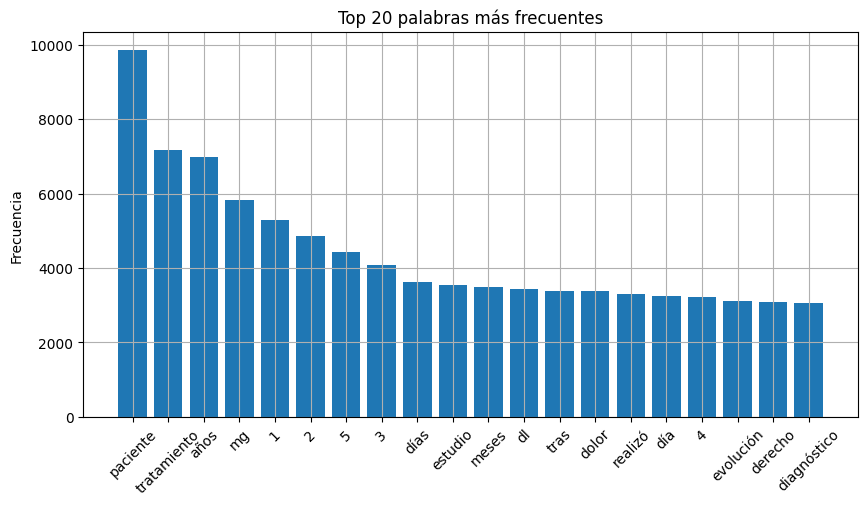

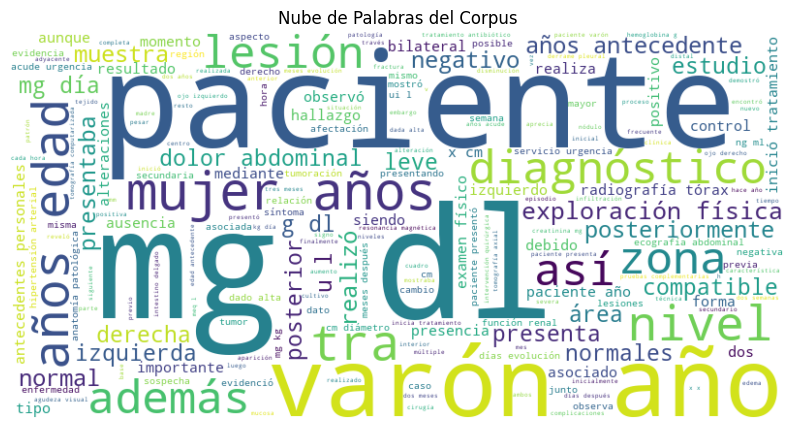

Conservar Stopwords


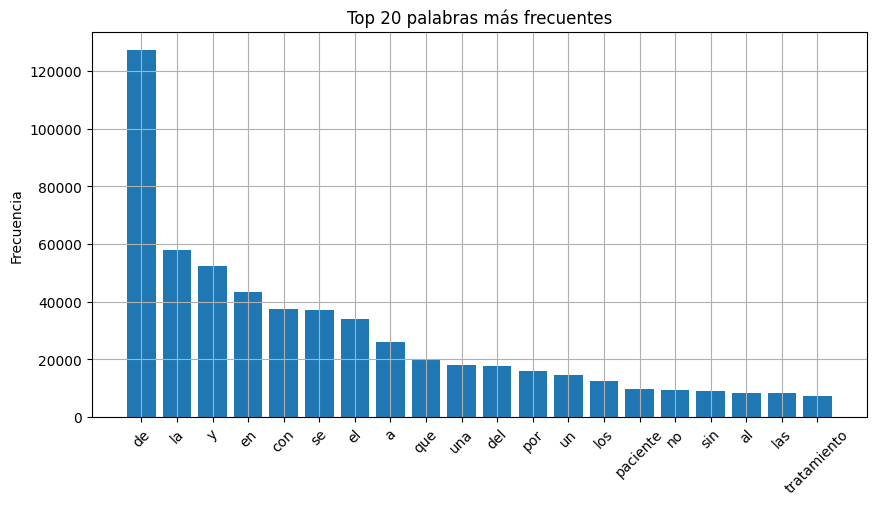

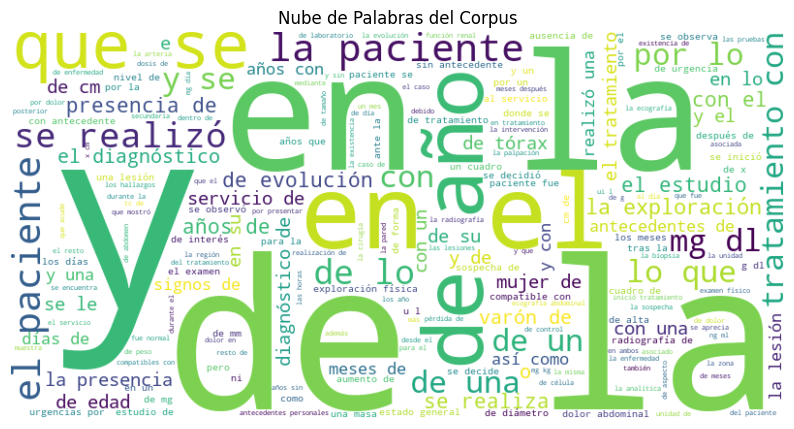

In [26]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import nltk

# Asegúrate de tener stopwords descargadas
nltk.download("stopwords")
from nltk.corpus import stopwords

def graficos_corpus(corpus_general, top_n=20, remover_stopwords=True):
    # Tokenizar rápido
    tokens = corpus_general.lower().split()

    # Remover stopwords si se activa
    if remover_stopwords:
        stop_es = set(stopwords.words("spanish"))
        tokens = [t for t in tokens if t not in stop_es]

    # --- Gráfico de barras ---
    contador = Counter(tokens)
    palabras_comunes = contador.most_common(top_n)

    palabras, freqs = zip(*palabras_comunes)

    plt.figure(figsize=(10,5))
    plt.bar(palabras, freqs)
    plt.grid()
    plt.xticks(rotation=45)
    plt.title(f"Top {top_n} palabras más frecuentes")
    plt.ylabel("Frecuencia")
    plt.show()

    print("")
    # --- Nube de palabras ---
    wordcloud = WordCloud(width=800, height=400, background_color="white",
                          max_words=200).generate(" ".join(tokens))

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de Palabras del Corpus")
    plt.show()

# Ejemplo de uso:
print("Remover Stopwords")
graficos_corpus(preprocesar_texto(texto = corpus_general, remover_stopwords=True), top_n=20, remover_stopwords=True)
print("Conservar Stopwords")
graficos_corpus(preprocesar_texto(texto = corpus_general, remover_stopwords=False), top_n=20, remover_stopwords=False)



In [27]:
conteo_doc = df_textos.groupby("archivo")["word_count"].sum()
conteo_doc

archivo
S0004-06142005000100009-1.txt     608
S0004-06142005000200004-1.txt     503
S0004-06142005000200009-1.txt     139
S0004-06142005000200009-2.txt     198
S0004-06142005000200009-3.txt      75
                                 ... 
cc_onco719.txt                   1384
cc_onco729.txt                    630
cc_onco737.txt                    733
cc_onco792.txt                    778
cc_onco95.txt                     427
Name: word_count, Length: 4932, dtype: int64

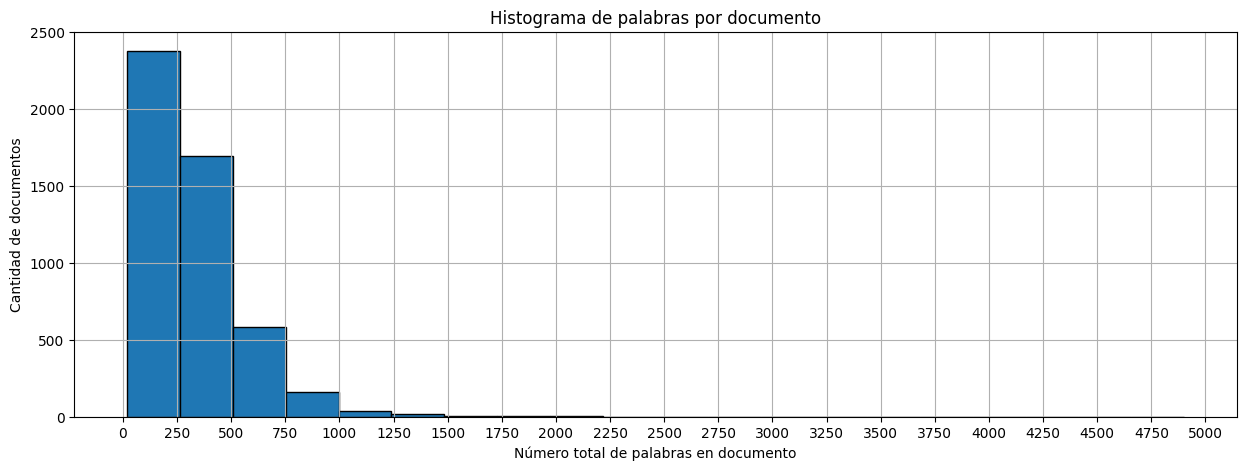

In [28]:
plt.figure(figsize=(15,5))
plt.hist(df_textos["word_count"], bins=20, edgecolor="black")
plt.xticks(range(0, max(conteo_doc)+250, 250))
plt.xlabel("Número total de palabras en documento")
plt.ylabel("Cantidad de documentos")
plt.grid()
plt.title("Histograma de palabras por documento")
plt.show()